<a href="https://colab.research.google.com/github/Saadman53/Thesis-Human-Activity-Recognition/blob/main/Sobel_EMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
gdrive_path = "drive/My Drive/Dataset/sobel_train__0to582_25x227x227.mat"
gdrive_path2 = "drive/My Drive/Dataset/sobel_train__583to874_25x227x227.mat"
gdrive_path3 = "drive/My Drive/Dataset/sobel_train__875to1164_25x227x227.mat"

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data

import torchvision
import torchvision.transforms as transforms



import random
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


from torch.utils.data import DataLoader, ConcatDataset
# from torchvision import transforms
from sklearn.model_selection  import StratifiedKFold

import torch.optim.lr_scheduler as lr_scheduler
%matplotlib inline

import scipy.io as sio
torch.autograd.set_detect_anomaly(True)


from functools import partial
from typing import Any, Optional

import torch
import torch.nn as nn


In [3]:
dat = sio.loadmat(gdrive_path)

In [4]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'filename', 'label'])

In [5]:
dat['data'].shape

(583, 25, 227, 227)

In [6]:
def EMI(data):
  dset = []
  for i in range(data.shape[0]):
    emi = np.zeros(227*227).astype(int)
    for j in range(data.shape[1]):
      d = data[i][j].ravel().astype(int)
      d[d > 0] = 1
      emi = emi|d
    emi = emi.reshape((227,227))
    dset.append(emi)
    print(i*100/data.shape[0])
  return dset

In [7]:
dataset = np.array(EMI(dat["data"]))

0.0
0.17152658662092624
0.34305317324185247
0.5145797598627787
0.6861063464837049
0.8576329331046312
1.0291595197255574
1.2006861063464838
1.3722126929674099
1.5437392795883362
1.7152658662092624
1.8867924528301887
2.058319039451115
2.229845626072041
2.4013722126929675
2.5728987993138936
2.7444253859348198
2.9159519725557463
3.0874785591766725
3.2590051457975986
3.4305317324185247
3.6020583190394513
3.7735849056603774
3.9451114922813035
4.11663807890223
4.288164665523156
4.459691252144082
4.631217838765009
4.802744425385935
4.974271012006861
5.145797598627787
5.317324185248713
5.4888507718696395
5.660377358490566
5.831903945111493
6.003430531732419
6.174957118353345
6.346483704974271
6.518010291595197
6.689536878216123
6.861063464837049
7.0325900514579756
7.204116638078903
7.375643224699829
7.547169811320755
7.718696397941681
7.890222984562607
8.061749571183533
8.23327615780446
8.404802744425385
8.576329331046312
8.747855917667238
8.919382504288164
9.090909090909092
9.262435677530018
9

In [8]:
dat2 = sio.loadmat(gdrive_path2)
dataset2 = np.array(EMI(dat2["data"]))

0.0
0.3424657534246575
0.684931506849315
1.0273972602739727
1.36986301369863
1.7123287671232876
2.0547945205479454
2.3972602739726026
2.73972602739726
3.0821917808219177
3.4246575342465753
3.767123287671233
4.109589041095891
4.4520547945205475
4.794520547945205
5.136986301369863
5.47945205479452
5.821917808219178
6.164383561643835
6.506849315068493
6.8493150684931505
7.191780821917808
7.534246575342466
7.876712328767123
8.219178082191782
8.561643835616438
8.904109589041095
9.246575342465754
9.58904109589041
9.931506849315069
10.273972602739725
10.616438356164384
10.95890410958904
11.301369863013699
11.643835616438356
11.986301369863014
12.32876712328767
12.67123287671233
13.013698630136986
13.356164383561644
13.698630136986301
14.04109589041096
14.383561643835616
14.726027397260275
15.068493150684931
15.41095890410959
15.753424657534246
16.095890410958905
16.438356164383563
16.78082191780822
17.123287671232877
17.465753424657535
17.80821917808219
18.15068493150685
18.493150684931507
18

In [9]:
dat3 = sio.loadmat(gdrive_path3)
dataset3 = np.array(EMI(dat3["data"]))

0.0
0.3448275862068966
0.6896551724137931
1.0344827586206897
1.3793103448275863
1.7241379310344827
2.0689655172413794
2.413793103448276
2.7586206896551726
3.103448275862069
3.4482758620689653
3.793103448275862
4.137931034482759
4.482758620689655
4.827586206896552
5.172413793103448
5.517241379310345
5.862068965517241
6.206896551724138
6.551724137931035
6.896551724137931
7.241379310344827
7.586206896551724
7.931034482758621
8.275862068965518
8.620689655172415
8.96551724137931
9.310344827586206
9.655172413793103
10.0
10.344827586206897
10.689655172413794
11.03448275862069
11.379310344827585
11.724137931034482
12.068965517241379
12.413793103448276
12.758620689655173
13.10344827586207
13.448275862068966
13.793103448275861
14.137931034482758
14.482758620689655
14.827586206896552
15.172413793103448
15.517241379310345
15.862068965517242
16.20689655172414
16.551724137931036
16.896551724137932
17.24137931034483
17.586206896551722
17.93103448275862
18.275862068965516
18.620689655172413
18.9655172

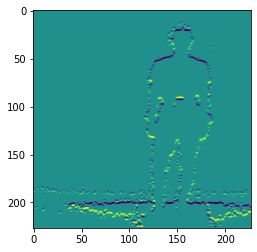

In [10]:
plt.imshow(dat2["data"][30][0])

In [14]:
dataset_final = np.concatenate([dataset, dataset2,dataset3])

In [15]:
dataset_final.shape

(1165, 227, 227)

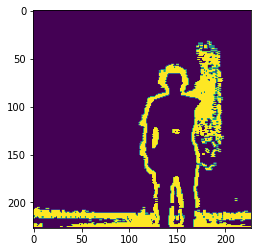

In [17]:
plt.imshow(dataset_final[900])

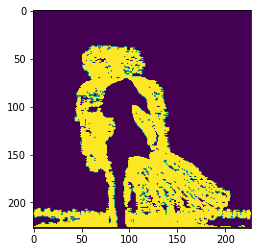

In [16]:
plt.imshow(dataset2[100])

In [18]:
filename_final = np.concatenate([dat['filename'].ravel(), dat2['filename'].ravel(),dat3['filename'].ravel()])
filename_final.shape

(1165,)

In [19]:
label_final = np.concatenate([dat['label'].ravel(), dat2['label'].ravel(),dat3['label'].ravel()])
label_final.shape

(1165,)

In [20]:
dic = {'data':dataset_final, 'filename':filename_final, 'labels': label_final}
sio.savemat("drive/My Drive/Dataset/sobel_227x227.mat", dic)